In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [4]:
cctv = pd.read_csv("seoulCCTV.csv")
pop = pd.read_excel("seoulPopulation.xlsx")

In [158]:
cctv
pop

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764
5,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.15,36231
6,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.32,39997
7,2017.1/4,광진구,158960,372164,180992,191172,357211,174599,182612,14953,6393,8560,2.25,42214
8,2017.1/4,동대문구,159839,369496,182932,186564,354079,177021,177058,15417,5911,9506,2.22,54173
9,2017.1/4,중랑구,177548,414503,206102,208401,409882,204265,205617,4621,1837,2784,2.31,56774


In [22]:
x = cctv.sort_values("소계",ascending=True).reset_index(drop=True)["소계"]
y = cctv.sort_values("소계",ascending=True)["기관명"]

<BarContainer object of 25 artists>

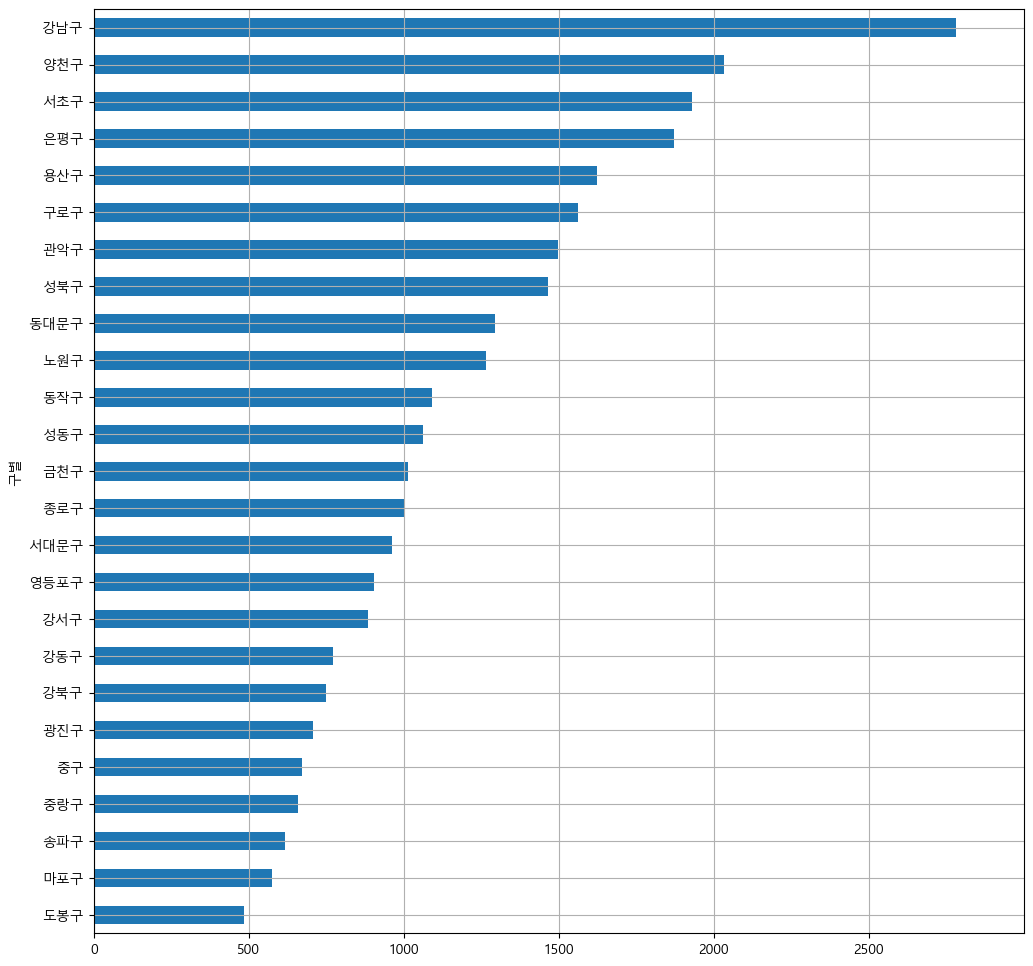

In [50]:
plt.figure(figsize=(12,12))
plt.grid(True)
plt.ylabel("구별")
plt.xlim(0, 3000)
plt.xticks(range(0, 3000, 500))
plt.margins(0.01)
plt.barh(y, x, height=0.5)

In [76]:
pop.head(4)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425


In [73]:
cctv.head(2)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377


In [100]:
tmp1 = cctv.iloc[:,0:2].sort_values(by="기관명").reset_index(drop=True)
tmp2 = pop.iloc[3:,1:4].sort_values(by="자치구").iloc[:,1:].reset_index(drop=True)

In [104]:
tmp1 = tmp1.join(tmp2)
tmp1

,기관명,소계,세대,인구
0,강남구,2780,234107,570500
1,강동구,773,179676,453233
2,강북구,748,141554,330192
3,강서구,884,247696,603772
4,관악구,1496,253826,525515
5,광진구,707,158960,372164
6,구로구,1561,172272,447874
7,금천구,1015,105146,255082
8,노원구,1265,219957,569384
9,도봉구,485,136613,348646


In [153]:
x2 = tmp1.sort_values(by="인구").reset_index(drop=True)
y2 = tmp1.sort_values(by="소계").reset_index(drop=True)

In [155]:
y2

,기관명,소계,세대,인구
0,도봉구,485,136613,348646
1,마포구,574,169404,389649
2,송파구,618,259883,667483
3,중랑구,660,177548,414503
4,중구,671,59481,133240
5,광진구,707,158960,372164
6,강북구,748,141554,330192
7,강동구,773,179676,453233
8,강서구,884,247696,603772
9,영등포구,904,165462,402985


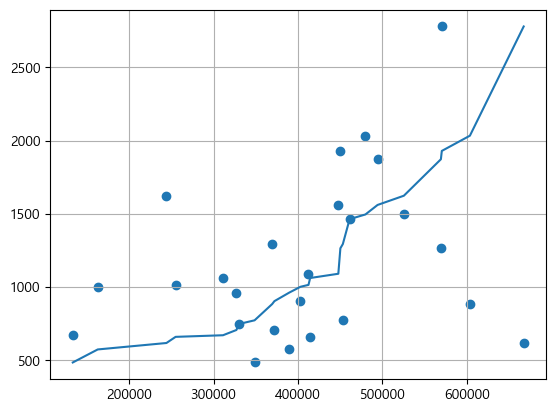

In [156]:
plt.figure()
plt.grid(True)
plt.scatter(tmp1["인구"],tmp1["소계"])
plt.plot(x2["인구"],y2["소계"])

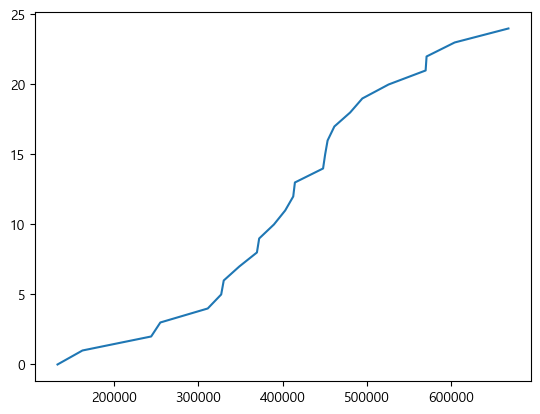